In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [79]:
data = pd.read_csv('Combined Closed Business.csv', encoding='latin-1')

In [80]:
data.head()

,Company Name,Executive First Name,Executive Last Name,Address,City,State,ZIP Code,Credit Score Alpha,Executive Gender,Executive Title,Fax Number Combined,IUSA Number,Location Employee Size Range,Location Sales Volume Range,Phone Number Combined,Primary SIC Code,Primary SIC Description,SIC Code 1,SIC Code 1 Description,Record Type
0,235 Media Group,Bill,Hennessey,235 Minot St # 3,Dorchester,MA,2124,A,Male,Owner,NaN,71-113-8265,5 to 9,$1-2.5 Million,(617) 637-0515,737311,Website Design Service,737311,Website Design Service,Closed/Out of Business
1,42nd Estate LLC,Adam,Pieniazek,47 Roseclair St,Dorchester,MA,2125,B+,Male,Owner,NaN,40-046-5272,1 to 4,"Less Than $500,000",(617) 288-4185,653118,Real Estate,653118,Real Estate,Closed/Out of Business
2,732 Numbers LLC,NaN,NaN,175 Adams St,Dorchester,MA,2122,B+,NaN,NaN,NaN,70-639-7248,20 to 49,$20-50 Million,(617) 825-5263,481304,Telephone Companies,481304,Telephone Companies,Closed/Out of Business
3,97 Circuit,NaN,NaN,97 Circuit St,Roxbury,MA,2119,A,NaN,NaN,NaN,42-512-6286,5 to 9,"$500,000-1 Million",(617) 427-9797,653118,Real Estate,653118,Real Estate,Closed/Out of Business
4,A & A House Keeping & Catering,NaN,NaN,42 Fox St,Dorchester,MA,2122,C+,NaN,NaN,NaN,42-778-2839,1 to 4,"Less Than $500,000",(617) 326-6487,734922,House Cleaning,734922,House Cleaning,Closed/Out of Business


In [81]:
data.dtypes
data.isnull().sum()
data.shape

(829, 20)

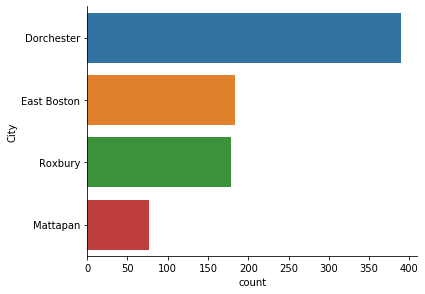

In [82]:
sns.catplot(y='City',
           kind='count',
            height=4, 
            aspect=1.5,
            order=data.City.value_counts().index,
           data=data)

Text(3.8000000000000043, 0.5, 'Count')

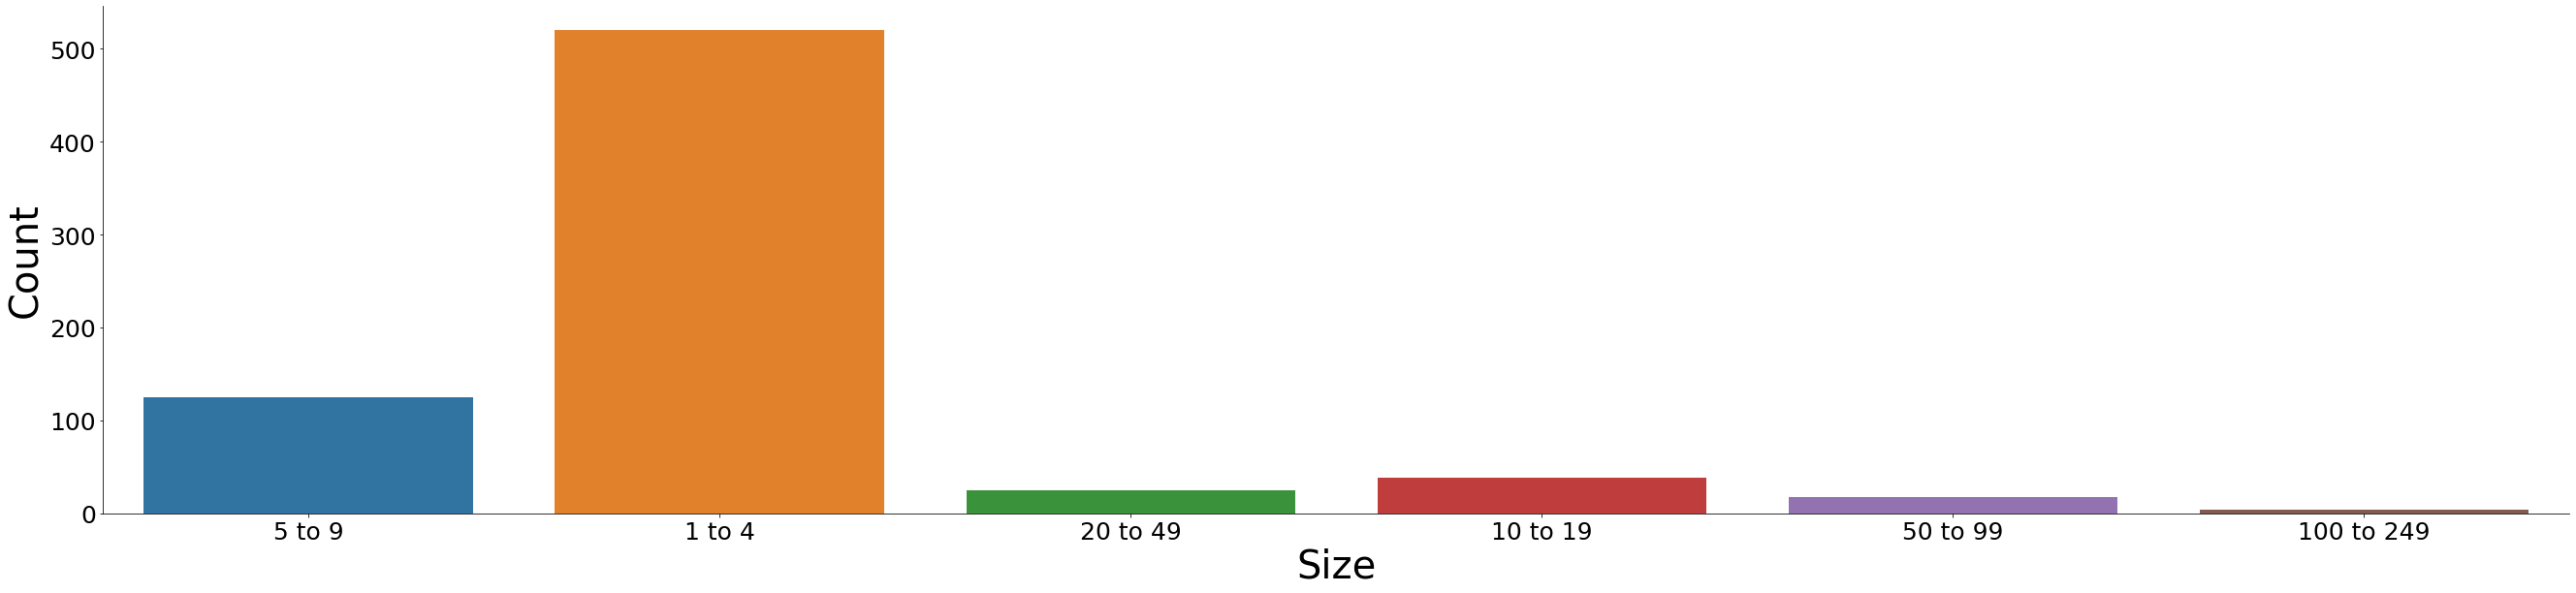

In [83]:
sns.catplot(x='Location Employee Size Range',
           kind='count',
            height=8, 
            aspect=4.5,
            #color='black',
           data=data)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel('Size', fontsize=40)
plt.ylabel('Count', fontsize=40)

In [56]:
data1 = pd.read_csv('crime_incident.csv', encoding='latin-1')

In [57]:
data1.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
4,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"


In [58]:
data1 = data1.loc[data1['YEAR'].isin([2018,2019])]

In [59]:
data1 = data1.loc[data1['UCR_PART'] == 'Part One']

In [60]:
# Remove unused columns
data1 = data1.drop(['INCIDENT_NUMBER','OFFENSE_CODE','UCR_PART','Location'], axis=1)

# Convert OCCURED_ON_DATE to datetime
data1['OCCURRED_ON_DATE'] = pd.to_datetime(data1['OCCURRED_ON_DATE'])

# Fill in nans in SHOOTING column
data1.SHOOTING.fillna('N', inplace=True)

# Convert DAY_OF_WEEK to an ordered category
data1.DAY_OF_WEEK = pd.Categorical(data1.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

# Replace -1 values in Lat/Long with Nan
data1.Lat.replace(-1, None, inplace=True)
data1.Long.replace(-1, None, inplace=True)

# Rename columns to something easier to type (the all-caps are annoying!)
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
data1.rename(index=str, columns=rename, inplace=True)

# Check
data1.head()

,Group,Description,District,Area,Shooting,Date,Year,Month,Day,Hour,Street,Lat,Long
3,Auto Theft,AUTO THEFT,E18,519,N,2019-10-13 09:28:24,2019,10,Sunday,9,LINCOLN ST,42.259518,-71.121563
4,Auto Theft,AUTO THEFT,E18,493,N,2019-10-12 20:11:26,2019,10,Saturday,20,METROPOLITAN AVE,42.262092,-71.116710
5,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,N,2019-10-12 15:12:43,2019,10,Saturday,15,ALLSTON ST,42.352375,-71.135096
6,Auto Theft,AUTO THEFT,D4,130,N,2019-10-12 04:41:52,2019,10,Saturday,4,SAINT JAMES AVE,42.349476,-71.076402
7,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,N,2019-10-02 08:08:49,2019,10,Wednesday,8,N MEAD ST,42.381846,-71.066551


In [62]:
# A few more data checks
data1.dtypes
data1.isnull().sum()
data1.shape


(30720, 13)

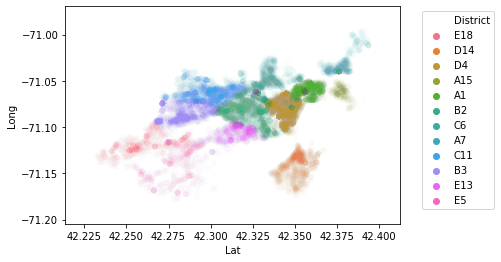

In [87]:
# Plot districts
sns.scatterplot(x='Lat',
               y='Long',
                hue='District',
                alpha=0.01,
               data=data1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [88]:
import folium
from folium.plugins import HeatMap

In [91]:
# Create basic Folium crime map
#crime_map = folium.Map(location=[42.3125,-71.0875], 
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = data1[data1.Year == 2018]
data_heatmap = data1[['Lat','Long']]
data_heatmap = data1.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map